In [1]:
import itertools
import random
import networkx as nx

In [2]:
##1. Python's random module

In [3]:
p=0.75
for _ in range(10):
    
    r=random.random()
    if r<p:
        print('heads')
    else:
        print('tails')

heads
heads
heads
heads
tails
heads
heads
tails
tails
tails


In [4]:
names=['alice','bob','cathy','dan']
random.choice(names)

'cathy'

In [5]:
G=nx.cycle_graph(5)
random.sample(G.nodes,2)

C:\Users\ahmed\AppData\Local\Temp/ipykernel_29684/3017077660.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(G.nodes,2)


[4, 3]

In [6]:
names=['alice','bob','carol']
tickets=[1,3,4]
for _ in range(10):
    print(random.choices(names,tickets))

['bob']
['bob']
['carol']
['carol']
['carol']
['carol']
['bob']
['carol']
['carol']
['bob']


In [7]:
random.choices(names,tickets,k=10)

['carol',
 'carol',
 'carol',
 'carol',
 'bob',
 'bob',
 'carol',
 'carol',
 'bob',
 'carol']

In [8]:
##2. Random Network Model

In [9]:
elemnts=[0,1,2,3,4]
list(itertools.combinations(elemnts,2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [11]:
G=nx.Graph()
G.add_nodes_from(elemnts)
list(itertools.combinations(G.nodes,3))

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4)]

In [12]:
def gnp_randm(N,p):
    G=nx.Graph()
    G.add_nodes_from(range(N))
    for i, j in itertools.combinations(G.nodes,2):
        r=random.random()
        if r<p:
            G.add_edge(i,j)
    return G

Graph has 12 edges.


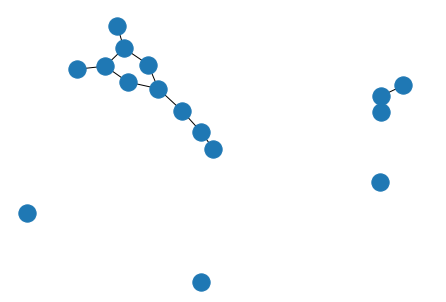

In [15]:
G=gnp_randm(16,0.15)
nx.draw(G)
print('Graph has',G.number_of_edges(),'edges.')

In [16]:
def gnm_randm(N, M):
    G=nx.Graph()
    G.add_nodes_from(range(N))
    possible_edges=itertools.combinations(G.nodes,2)
    edges_to_add=random.sample(list(possible_edges),M)
    G.add_edges_from(edges_to_add)
    return G


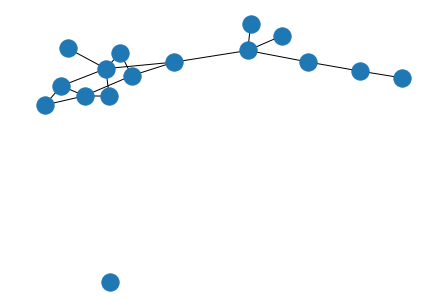

In [17]:
G=gnm_randm(16, 18)
nx.draw(G)

In [18]:
##3. Small-World Model

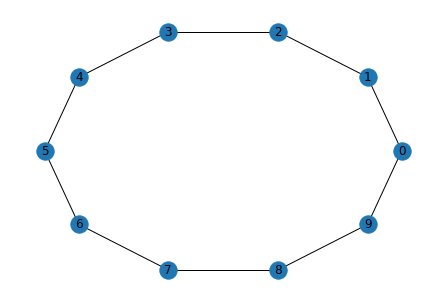

In [19]:
N=10
G=nx.cycle_graph(N)
nx.draw_circular(G,with_labels=True)

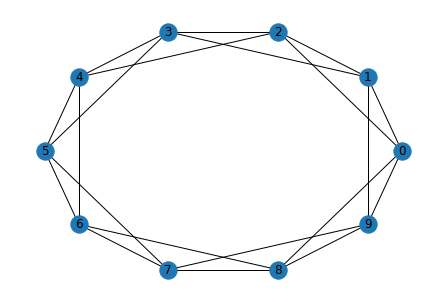

In [20]:
k = 4
for n in G.nodes:
    for i in range(1,k//2+1):
        left=(n-i)%N
        right=(n+i)%N 
        G.add_edge(n,left)
        G.add_edge(n,right)
nx.draw_circular(G,with_labels=True)

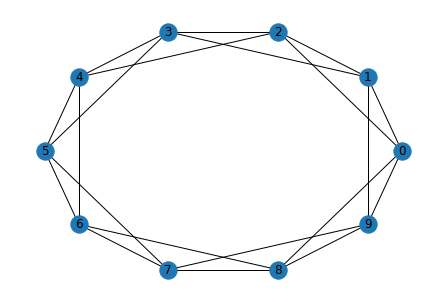

In [21]:
p = 0.1
for u,v in list(G.edges):
    if random.random()<p:
        not_neighbors=set(G.nodes)-set(G.neighbors(u))
        w=random.choice(list(not_neighbors))
        G.remove_edge(u,v)
        G.add_edge(u,w)
nx.draw_circular(G,with_labels=True)

In [22]:
def watts_strogatz_graph(N, k, p):
    G = nx.cycle_graph(N)
    for n in G.nodes:
        for i in range(1,k//2+1):
            left=(n-i)%N
            right=(n+i)%N 
            G.add_edge(n,left)
            G.add_edge(n,right)
    
    for u, v in list(G.edges):
        if random.random() < p:
            not_neighbors=set(G.nodes)-set(G.neighbors(u))-{u}
            w=random.choice(list(not_neighbors))
            G.remove_edge(u,v)
            G.add_edge(u,w)

    return G

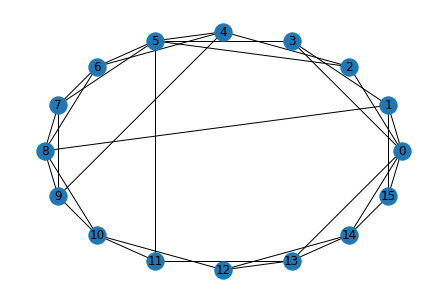

In [26]:
G=watts_strogatz_graph(16, 4, 0.2)
nx.draw_circular(G,with_labels=True)

In [27]:
##4. Preferential Attachment Model

[4, 1, 1, 1, 1]


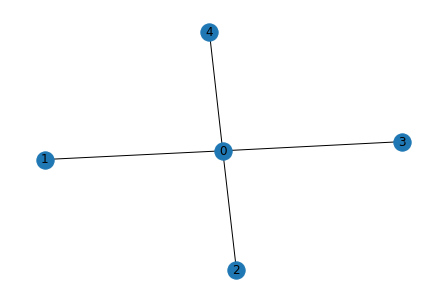

In [28]:
G=nx.star_graph(4)
degrees=[G.degree(n) for n in G.nodes]
print(degrees)
nx.draw(G,with_labels=True)

In [29]:
def barabasi_albert_graph(N,m):
    G=nx.complete_graph(m+1)
    for i in range(G.number_of_nodes(),N):
        new_neighbors=[]
        possible_neighbors=list(G.nodes)
        for _ in range(m):
            degrees=[G.degree(n) for n in possible_neighbors]
            j=random.choices(possible_neighbors,degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
            
        for j in new_neighbors:
            G.add_edge(i,j)
    return G

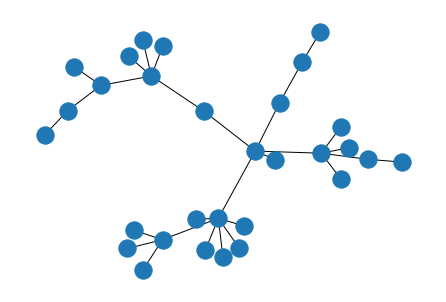

In [30]:
G=barabasi_albert_graph(30,1)
nx.draw(G)